# Challenge 4 - 2020/2021 evaluation

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn.metrics import mean_squared_error


To evaluate the model performance in 2020 and 2021 I decided to use the first one, namely the long-term model.

We can use statsmodels api to load the model saved before, trained on the series 2006-2018:

In [2]:
# model_one = sm.load('1_y_model') # load the model

In github the model file cannot be uploaded due to its size.

This is the reason why we will do again the training to use it for 2020 and 2021

## 1. 2020 evaluation

### 1.1 Model updating for 2020

Since in this case we are moving from 2018 to 2019 to forecast 2020 values, we use the `extend` method to update the model with new data

In [3]:
# read the data to obtain values from 2019
raw_url = 'https://raw.githubusercontent.com/leoiania/interviews-data-science-assignment/1b0d1c082053383f7f292f17e95f830cd259bbcc/datasets/italian-power-load/load.csv'
data = pd.read_csv(raw_url, parse_dates=['Date'], index_col='Date')

new_observations = data.loc['2019']

Re-training of the model:

In [4]:
train_data = data.loc[:'2018']
model = sm.tsa.statespace.SARIMAX(train_data,
                                  order=(0,0,0),
                                  seasonal_order=(1,0,0,140),                                 
                                  freq='D')

# fit the model to the data
results = model.fit()

c:\ProgramData\Anaconda3\envs\text_mining\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [5]:
# update the model
updated_20 = results.extend(new_observations)

Then, we can obtain the forecast for 2020:

In [6]:
#obtain forecast
preds_20 = updated_20.forecast(steps=366) # 366 days because 2020 is a leap year

### 1.2 Model evaluation on 2020

We evaluate again the plot and then the RMSE for predicted values:

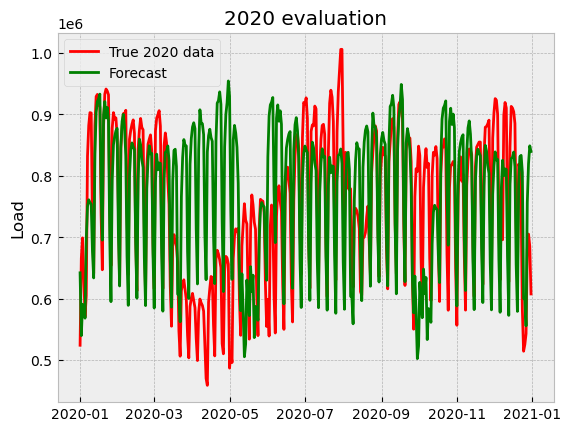

In [7]:
plt.plot(data.loc['2020'], color = "red",label = 'True 2020 data')
plt.plot(preds_20, color='green', label = 'Forecast')
plt.ylabel('Load')
plt.title("2020 evaluation")
plt.legend()
plt.show()

In [8]:
rmse_20 = mean_squared_error(data.loc['2020'].Load.values,
                          preds_20,squared = False)
print(rmse_20)

print('relative measure of rmse w.r.t range:')
print(rmse_20/(np.max(data.Load.values)-np.min(data.Load.values)))

118492.0063425172
relative measure of rmse w.r.t range:
0.16236182124257353


## 2. 2021 evaluation

### 2.1 Model updating for 2021

Now we use the same loaded model, but extending the update also to 2020 observed data.

In [9]:
new_observations2 = data.loc['2019':'2020']

In [10]:
updated_21 = results.extend(new_observations2)

In [11]:
# 2022 forecast
preds_21 = updated_21.forecast(steps=365)

### 1.2 Model evaluation on 2021

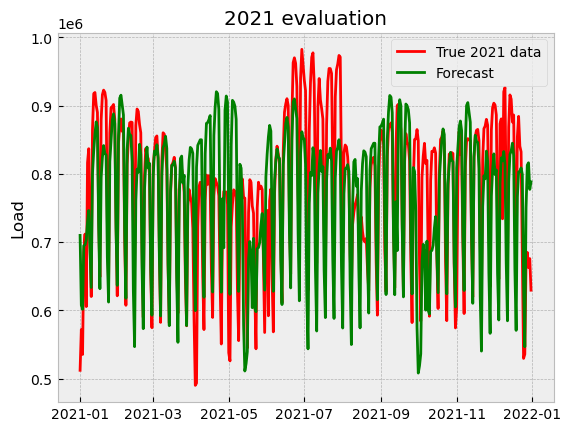

In [12]:
plt.plot(data.loc['2021'], color = "red",label = 'True 2021 data')
plt.plot(preds_21, color='green', label = 'Forecast')
plt.ylabel('Load')
plt.title("2021 evaluation")
plt.legend()
plt.show()

In [13]:
rmse_21 = mean_squared_error(data.loc['2021'].Load.values,
                          preds_21,squared = False)
print(rmse_21)

print('relative measure of rmse w.r.t range:')
print(rmse_21/(np.max(data.Load.values)-np.min(data.Load.values)))

82572.2255440863
relative measure of rmse w.r.t range:
0.11314330255018955


## A more general code, that can be used for future years:

In [15]:
# # Assuming same "source" of data, we read it:
# raw_url = 'https://raw.githubusercontent.com/leoiania/interviews-data-science-assignment/1b0d1c082053383f7f292f17e95f830cd259bbcc/datasets/italian-power-load/load.csv'
# data = pd.read_csv(raw_url, parse_dates=['Date'], index_col='Date')


# # load the same model:
# # model_one = sm.load('1_y_model')


# # update the model using the last 365 observations - we need to start from 2019 since the original one ends in 2018
# updated_gen = model_one.extend(data.loc['2019':])

# # obtain new predictions -- they need to be evaluated during the year:
# preds_gen = updated_gen.forecast(steps=365)

What we obtain in our specific case is forecast for never-seen-before days (original dataframe values ends on 7th February of 2022).